# Import

In [1]:
import sys

sys.path.append(".")
sys.path.append("..")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


TRAIN_DATA = '../data/train.csv'
VAL_DATA = '../data/val.csv'
TEST_DATA = '../data/test.csv'

NUM_FEATURES = [
    'BMI',
    'HDL cholesterol',
    'LDL cholesterol',
    'Total cholesterol',
    'Triglycerides',
    'Diastolic blood pressure'
]
CAT_FEATURES = [
    'Age',
    'Sex',
    'Ever smoked',
    'Snoring',
    'Insomnia',
    'Daytime napping',
    'Chronotype',
    'Sleep duration',
]
DISEASES = [
    'Asthma',
    'Cataract',
    'Diabetes',
    'GERD',
    'Hay-fever & Eczema',
    'Major depression',
    'Myocardial infarction',
    'Osteoarthritis',
    'Pneumonia',
    'Stroke'
]

sns.set_style("whitegrid", {'grid.linestyle': '--'})

# Classe distribution

In [2]:
# Load data
DF_TRAIN = pd.read_csv(TRAIN_DATA)
DF_VAL = pd.read_csv(VAL_DATA)
DF_TEST = pd.read_csv(TEST_DATA)

In [11]:
print(f"Training samples: {len(DF_TRAIN)}")
print(f"Validation samples: {len(DF_VAL)}")
print(f"Test samples: {len(DF_TEST)}")

Training samples: 284978
Validation samples: 10000
Test samples: 10000


In [4]:
# Calculating percentage case/control distribution
train_case_count = DF_TRAIN[DISEASES].sum()
val_case_count = DF_VAL[DISEASES].sum()
test_case_count = DF_TEST[DISEASES].sum()

train_control_count= len(DF_TRAIN) - train_case_count
val_control_count = len(DF_VAL) - val_case_count
test_control_count = len(DF_TEST) - test_case_count

train_case_percentage = (train_case_count / DF_TRAIN.shape[0]) * 100
train_control_percentage = (train_control_count / DF_TRAIN.shape[0]) * 100

val_case_percentage = (val_case_count / DF_VAL.shape[0]) * 100
val_control_percentage = (val_control_count / DF_VAL.shape[0]) * 100

test_case_percentage = (test_case_count / DF_TEST.shape[0]) * 100
test_control_percentage = (test_control_count / DF_TEST.shape[0]) * 100

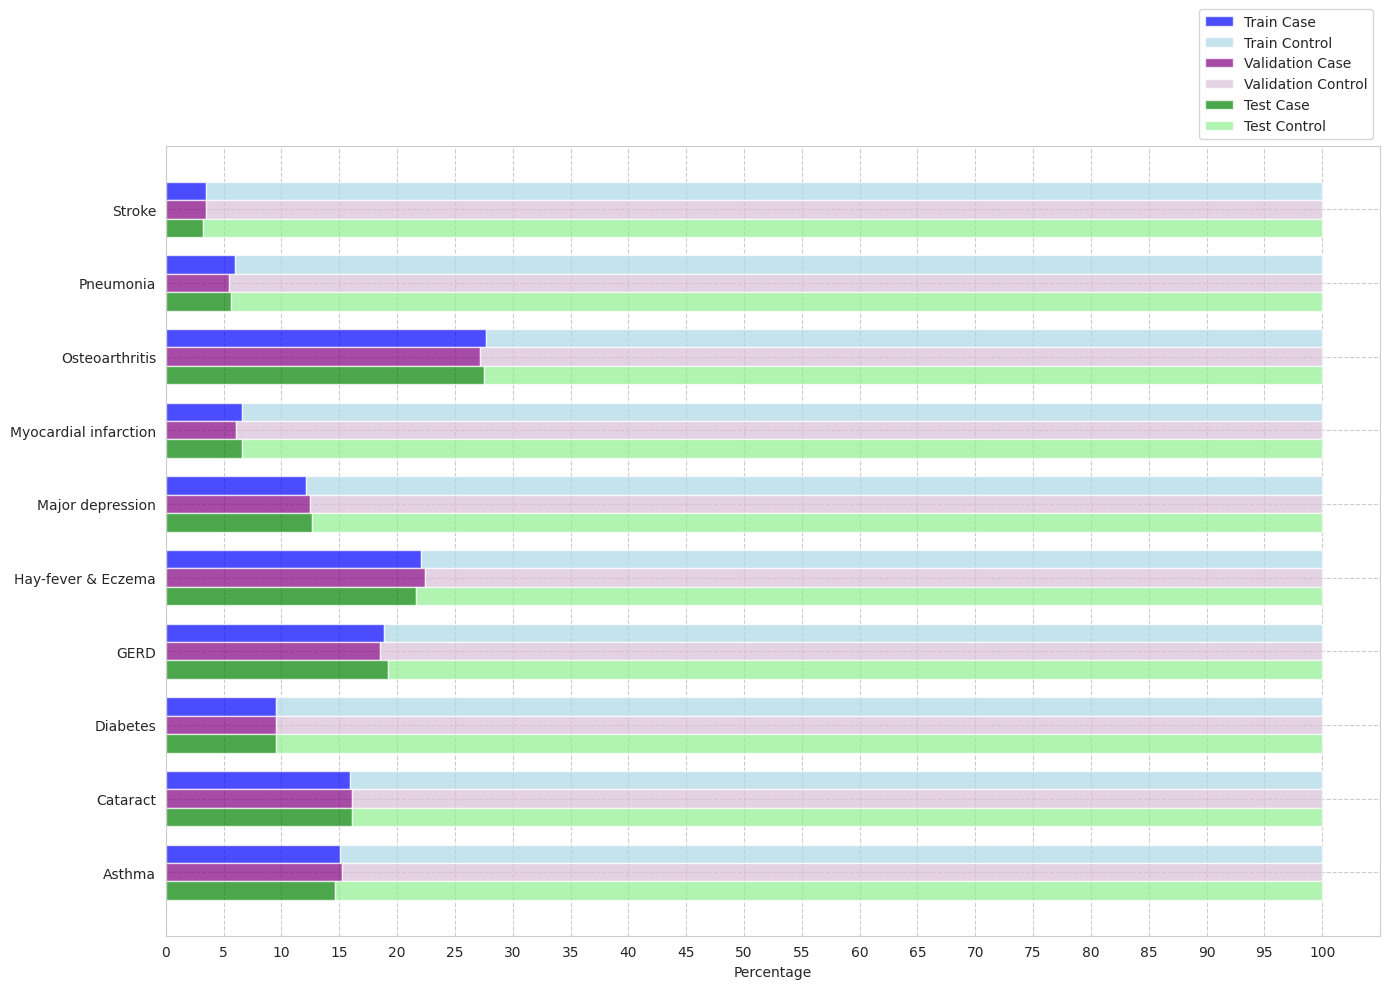

In [5]:
# Creating the bar plot with train, validation, and test datasets side by side
fig, ax = plt.subplots(figsize=(14, 10))
width = 0.25  # Width of the bars
indices = range(len(train_case_percentage))

# Plotting the case/control distribution for the train dataset
train_bars_case = ax.barh([i + width for i in indices], train_case_percentage, width, label='Train Case', color='blue', alpha=0.7)
train_bars_control = ax.barh([i + width  for i in indices], train_control_percentage, width, left=train_case_percentage, label='Train Control', color='lightblue', alpha=0.7)

# Plotting the case/control distribution for the validation dataset
val_bars_case = ax.barh([i for i in indices], val_case_percentage, width, label='Validation Case', color='purple', alpha=0.7)
val_bars_control = ax.barh([i for i in indices], val_control_percentage, width, left=val_case_percentage, label='Validation Control', color='thistle', alpha=0.7)

# Plotting the case/control distribution for the test dataset
test_bars_case = ax.barh([i - width for i in indices], test_case_percentage, width, label='Test Case', color='green', alpha=0.7)
test_bars_control = ax.barh([i - width for i in indices], test_control_percentage, width, left=test_case_percentage, label='Test Control', color='lightgreen', alpha=0.7)

# Adding labels and title
ax.set_xlabel('Percentage')
ax.set_yticks([i for i in indices])
ax.set_yticklabels(train_case_percentage.index)

# Adding the legend
ax.legend(loc='lower right', bbox_to_anchor=(1, 1))

# Setting xticks to every 5 percentage
ax.set_xticks(range(0, 101, 5))

# Adjusting the plot layout
plt.tight_layout()

# Show the plot
plt.show()

# Tokenization

In [6]:
from src.tokenizer import PhenotypeTokenizer
from matplotlib.lines import Line2D

### Uniform binning

In [7]:
# Fit tokenizer
tokenizer = PhenotypeTokenizer(n_bins=100, binning='uniform')
tokenizer.fit(DF_TRAIN, NUM_FEATURES, CAT_FEATURES + DISEASES)

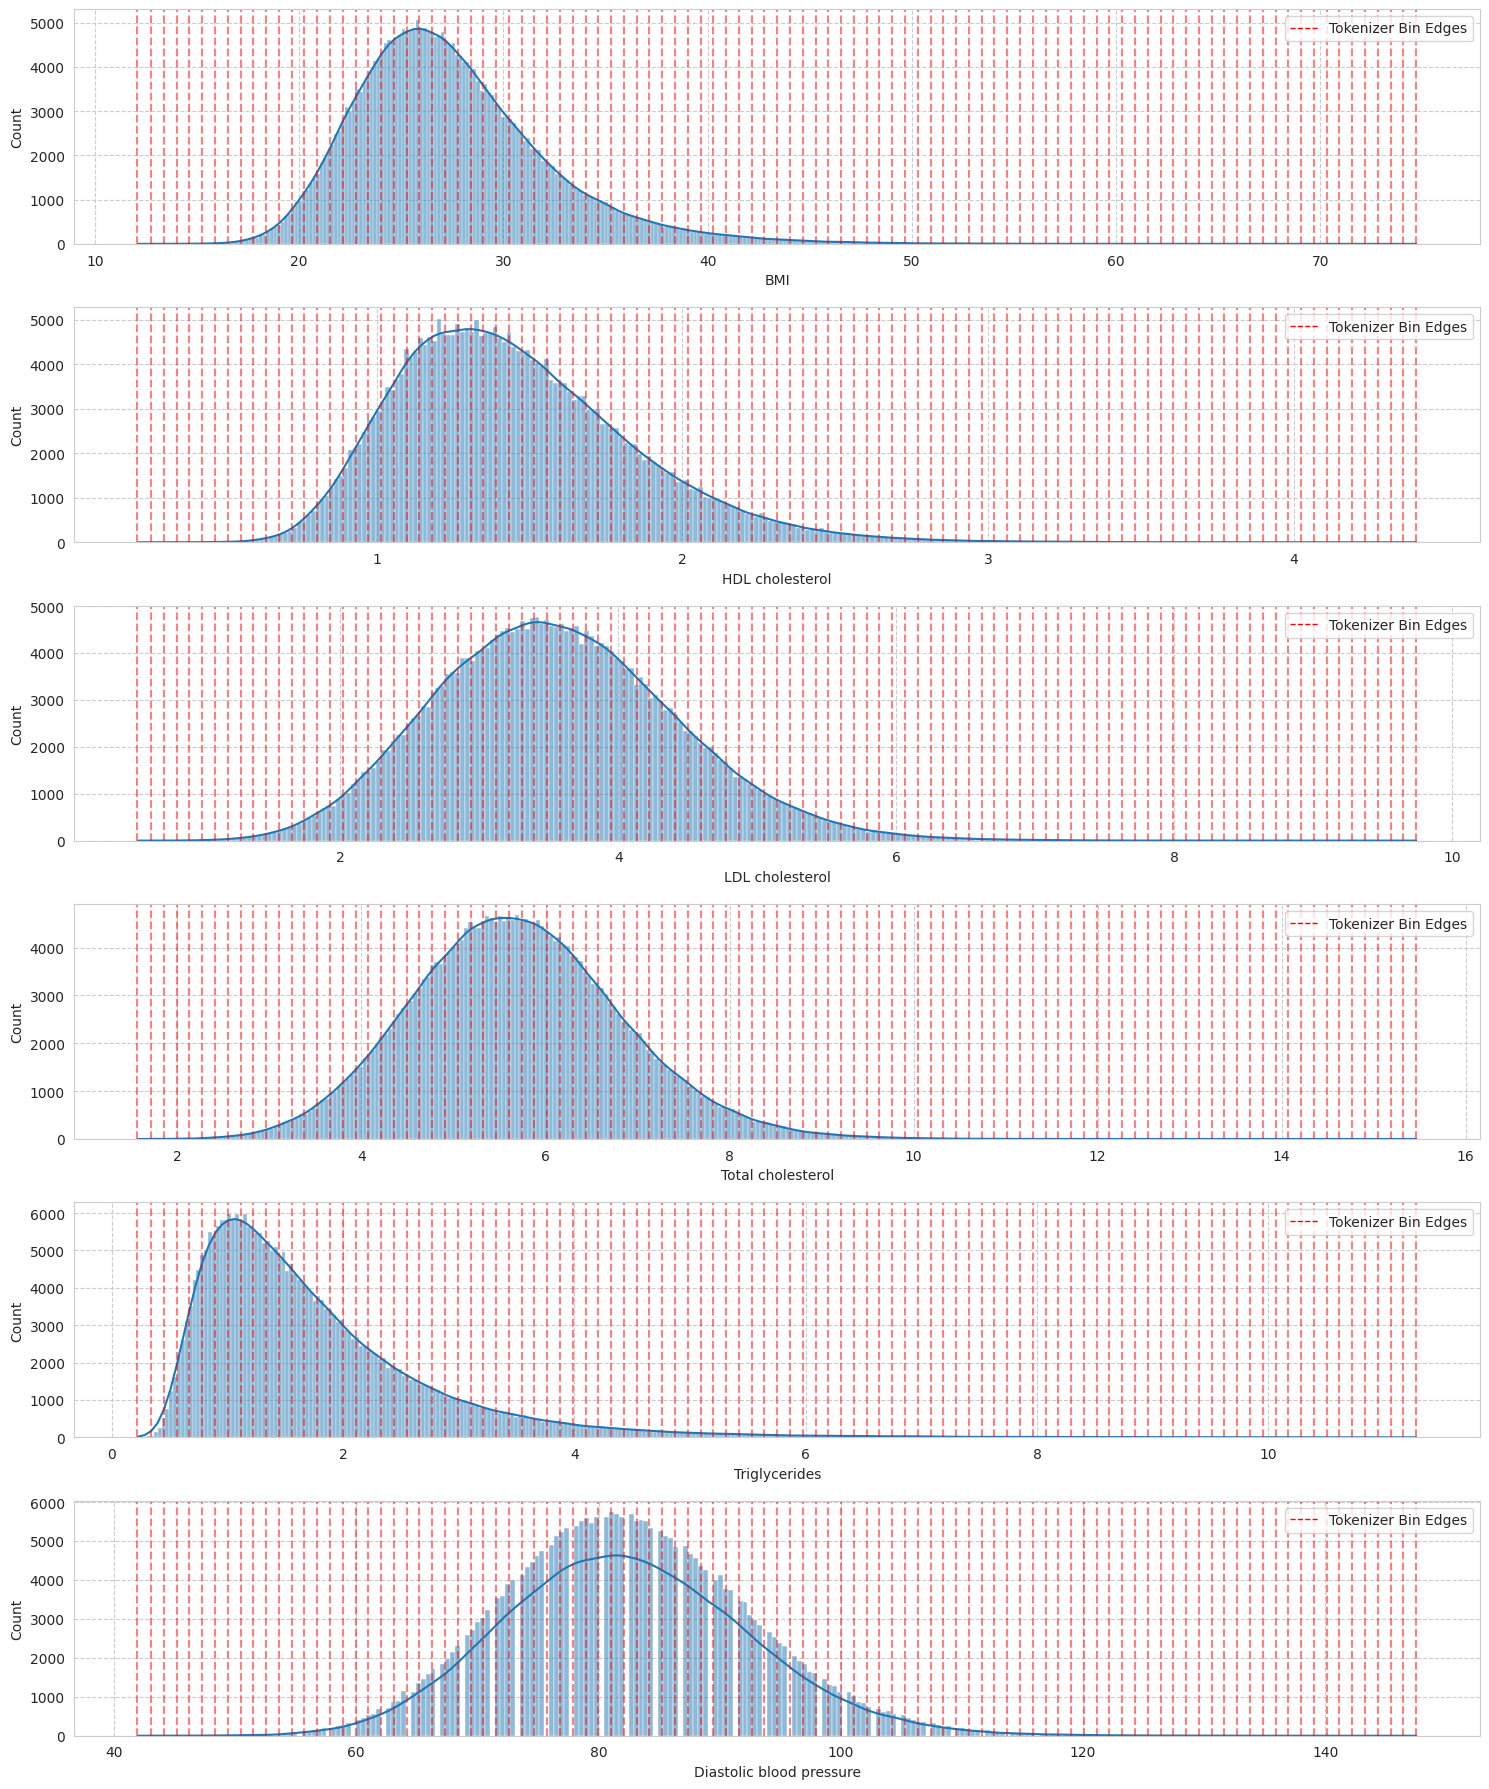

In [8]:
# Set up the plot
n_features = len(NUM_FEATURES)
n_cols = 1
n_rows = n_features
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axs = axs.flatten()

# Create a plot for each numerical feature
for i, feature in enumerate(NUM_FEATURES):
    ax = axs[i]
    
    # Plot the distribution
    sns.histplot(DF_TRAIN[feature], kde=True, ax=ax)
    
    # Get the bin edges for this feature
    bin_edges = tokenizer.bin_edges[feature]
    
    # Plot vertical lines for bin edges
    for edge in bin_edges:
        ax.axvline(edge, color='r', linestyle='--', alpha=0.5)
    
    # Set the title and labels
    #ax.set_title(f'Distribution of {feature} with Tokenizer Bins')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
    # Add legend
    legend_elements = [Line2D([0], [0], color='r', lw=1, linestyle='--', label='Tokenizer Bin Edges')]
    ax.legend(handles=legend_elements, loc='upper right')

# Remove any unused subplots
for i in range(n_features, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

### Quantile binning

In [9]:
# Fit tokenizer
tokenizer = PhenotypeTokenizer(n_bins=100, binning='quantile')
tokenizer.fit(DF_TRAIN, NUM_FEATURES, CAT_FEATURES + DISEASES)

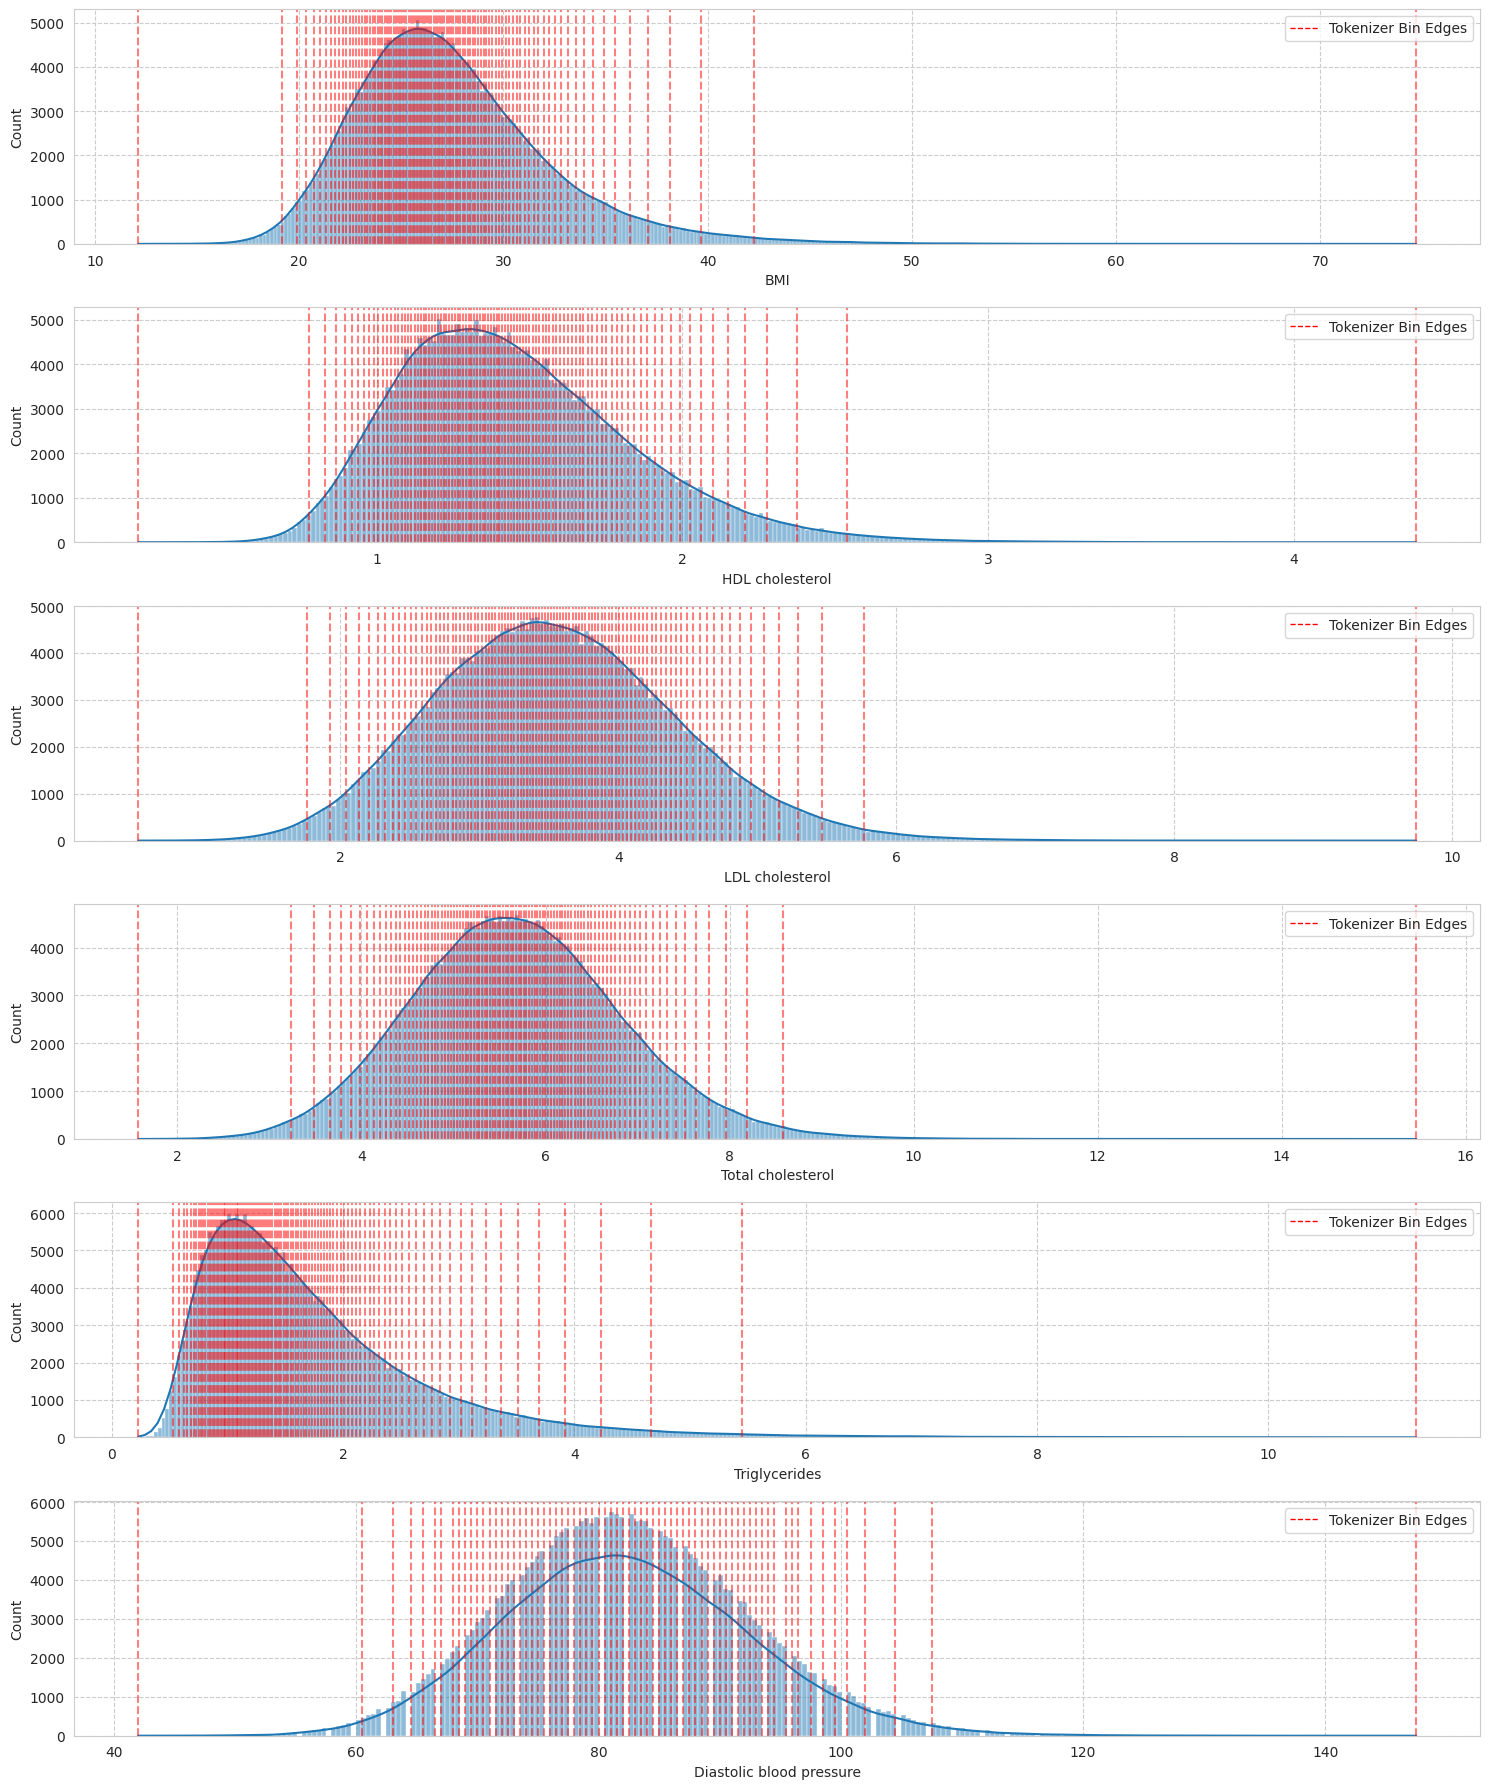

In [10]:
# Set up the plot
n_features = len(NUM_FEATURES)
n_cols = 1
n_rows = n_features
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))
axs = axs.flatten()

# Create a plot for each numerical feature
for i, feature in enumerate(NUM_FEATURES):
    ax = axs[i]
    
    # Plot the distribution
    sns.histplot(DF_TRAIN[feature], kde=True, ax=ax)
    
    # Get the bin edges for this feature
    bin_edges = tokenizer.bin_edges[feature]
    
    # Plot vertical lines for bin edges
    for edge in bin_edges:
        ax.axvline(edge, color='r', linestyle='--', alpha=0.5)
    
    # Set the title and labels
    #ax.set_title(f'Distribution of {feature} with Tokenizer Bins')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    
    # Add legend
    legend_elements = [Line2D([0], [0], color='r', lw=1, linestyle='--', label='Tokenizer Bin Edges')]
    ax.legend(handles=legend_elements, loc='upper right')

# Remove any unused subplots
for i in range(n_features, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

# Embeddings

In [11]:
import torch
import numpy as np
from sklearn.manifold import TSNE
from src.phet import PhET


def get_value_embeddings(model, tokenizer, phenotype_names, num_features, cat_features):
    value_embeddings = []
    value_labels = []
    phenotype_ids = []
    is_categorical = []
    
    with torch.no_grad():
        for phenotype_id, value_dict in tokenizer.v_id_map.items():
            phenotype_name = phenotype_names[phenotype_id]
            for value_desc, token_id in value_dict.items():
                value_tensor = torch.tensor([token_id]).long()
                value_embedding = model.embeddings.value_embeds(value_tensor).cpu().numpy()
                value_embeddings.append(value_embedding[0])
                value_labels.append(f"{phenotype_name}: {value_desc}")
                phenotype_ids.append(phenotype_id)
                is_categorical.append(phenotype_name in cat_features or phenotype_name not in num_features)
    
    return np.array(value_embeddings), value_labels, phenotype_ids, is_categorical


def plot_value_embeddings(value_embeddings, value_labels, phenotype_ids, is_categorical, phenotype_names):
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    embeddings_2d = tsne.fit_transform(value_embeddings)
    
    plt.figure(figsize=(20, 20))
    
    # Create a color palette for phenotype IDs
    unique_phenotypes = sorted(set(phenotype_ids))
    color_palette = sns.color_palette("husl", n_colors=len(unique_phenotypes))
    color_map = dict(zip(unique_phenotypes, color_palette))
    
    # Plot value embeddings
    for i, (x, y) in enumerate(embeddings_2d):
        plt.scatter(x, y, color=color_map[phenotype_ids[i]], alpha=0.7)
    
    # Add a legend with actual phenotype names
    for phenotype_id in unique_phenotypes:
        plt.scatter([], [], color=color_map[phenotype_id], label=phenotype_names[phenotype_id])
    plt.legend(title="Phenotypes", loc='center left', bbox_to_anchor=(1, 0.5), fontsize='x-small')
    
    # Annotate points
    for i, (x, y) in enumerate(embeddings_2d):
        if is_categorical[i]:
            # Annotate all categorical features
            plt.annotate(value_labels[i], xy=(x, y),
                         xytext=(5, 2), textcoords='offset points', ha='left', va='bottom',
                         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                         fontsize=6)
        elif i % 10 == 0:  # Annotate every 10th numerical feature
            plt.annotate(value_labels[i], xy=(x, y),
                         xytext=(5, 2), textcoords='offset points', ha='left', va='bottom',
                         bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5),
                         fontsize=6)
    
    plt.title('2D Visualization of Value Embeddings Colored by Phenotype')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.tight_layout()
    plt.show()

In [12]:
CKPT_PATH = '../ckpts/PhE-T/v0/best-epoch=3-step=3842.ckpt'
checkpoint = torch.load(CKPT_PATH, map_location=torch.device('cpu'))
tokenizer = checkpoint['hyper_parameters']['tokenizer']
model = PhET.from_lightning_checkpoint(CKPT_PATH).eval()

/tmp/ipykernel_18679/626038146.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(CKPT_PATH, map_location=torch.device('cpu'))


/n/groups/patel/tom/PhE-T/notebooks/../src/phet.py:183: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location=torch.device('cpu'))


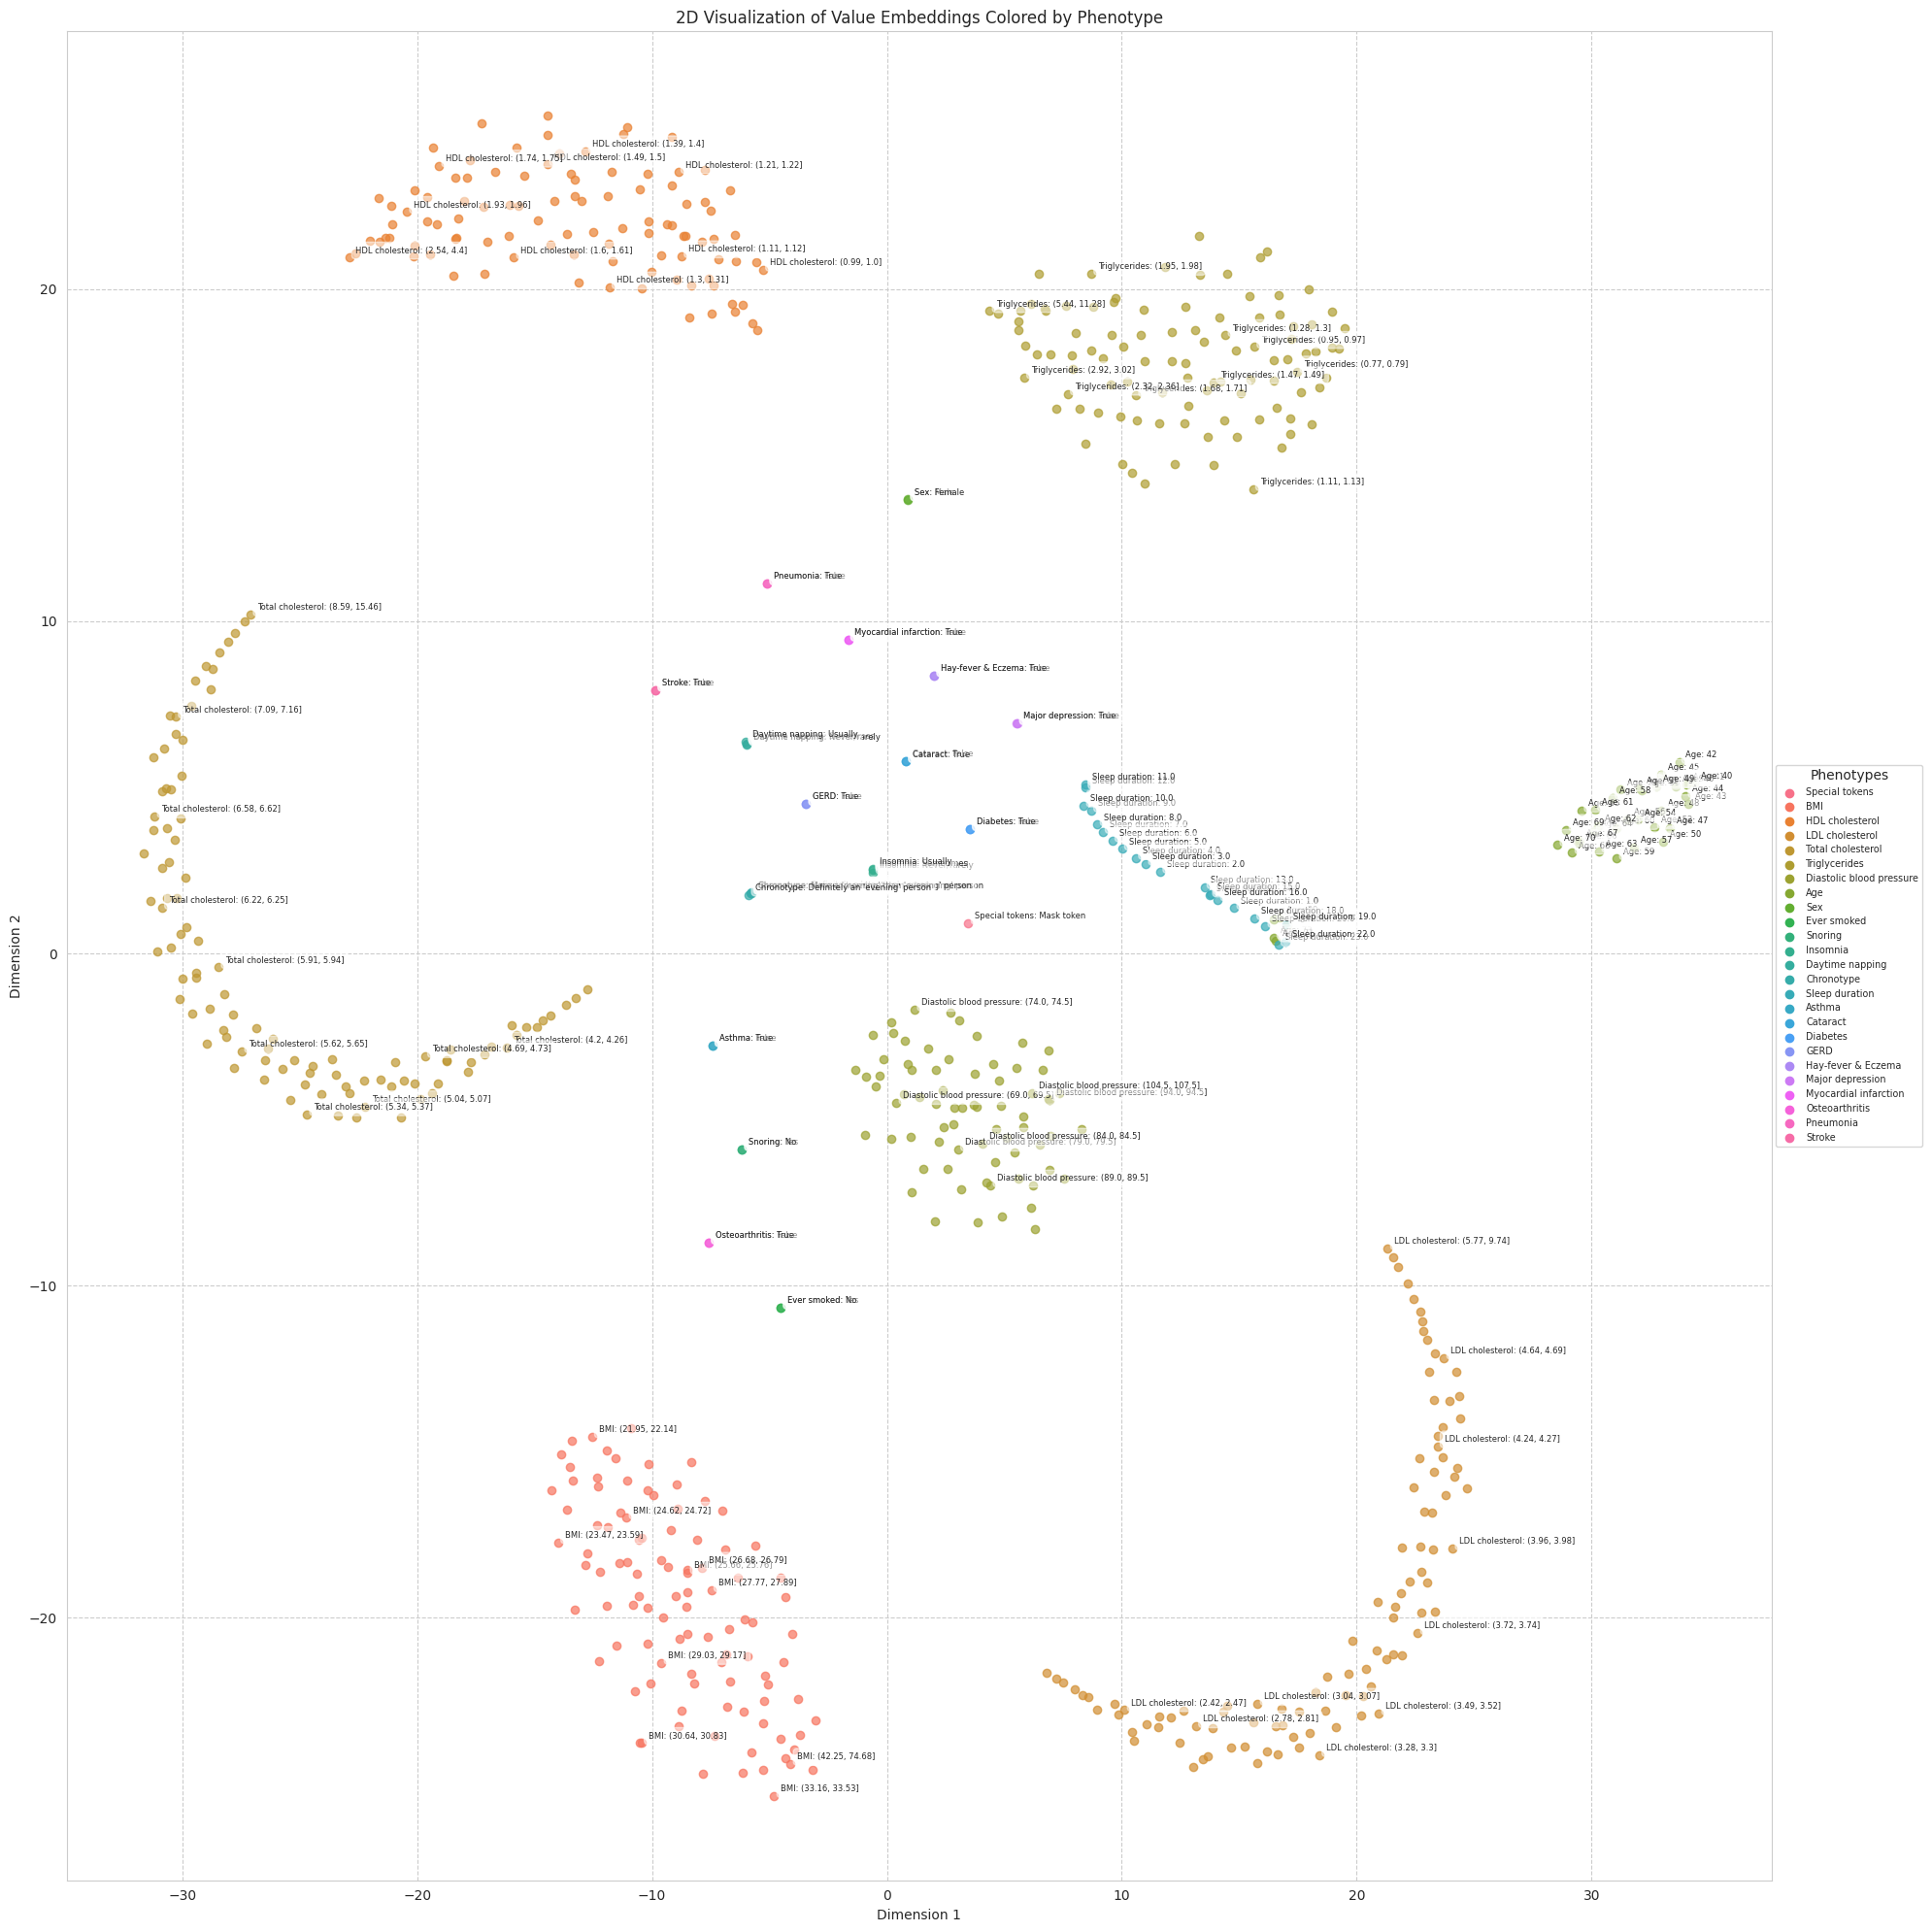

In [13]:
phenotype_names = ['Special tokens'] + NUM_FEATURES + CAT_FEATURES + DISEASES
value_embeddings, value_labels, phenotype_ids, is_categorical = get_value_embeddings(model, tokenizer, phenotype_names, NUM_FEATURES, CAT_FEATURES + DISEASES)
plot_value_embeddings(value_embeddings, value_labels, phenotype_ids, is_categorical, phenotype_names)

# Risk scores

In [3]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_risk_scores(file_path):
    with open(file_path, 'r') as f:
        risk_data = json.load(f)
    return risk_data["eids"], risk_data["y_scores"]

def plot_predictor_vs_score(phet_scores, logreg_scores, model_name, disease, predictor, df):    
    # Load the risk scores from the JSON files
    eids_phet, phet_scores = load_risk_scores(phet_scores)
    eids_logreg, logreg_scores = load_risk_scores(logreg_scores)
    
    # Create DataFrames for the risk scores
    df_phet = pd.DataFrame({'risk_score': phet_scores}, index=eids_phet)
    df_logreg = pd.DataFrame({'risk_score': logreg_scores}, index=eids_logreg)
    
    # Merge with dataframe
    df = df.set_index('eid')
    df_phet = df_phet.join(df[[predictor, 'Sex']]).dropna()
    df_logreg = df_logreg.join(df[[predictor, 'Sex']]).dropna()

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

    # Define colors for sexes
    colors = {'Male': 'blue', 'Female': 'red'}
    markers = {'Male': 'o', 'Female': 's'}
    
    # Predictor vs Risk Score PhE-T
    for sex in df_phet['Sex'].unique():
        subset = df_phet[df_phet['Sex'] == sex]
        ax1.scatter(subset[predictor], subset['risk_score'], alpha=0.5, label=sex, c=colors[sex], marker=markers[sex])
    ax1.set_xlabel(f'{predictor}')
    ax1.set_ylabel('Risk Score')
    ax1.set_title(f'{predictor} vs. Risk Score\n({disease}, {model_name})')
    ax1.legend(title='Sex')
    
    # Predictor vs Risk Score LogReg
    for sex in df_logreg['Sex'].unique():
        subset = df_logreg[df_logreg['Sex'] == sex]
        ax2.scatter(subset[predictor], subset['risk_score'], alpha=0.5, label=sex, c=colors[sex], marker=markers[sex])
    ax2.set_xlabel(f'{predictor}')
    ax2.set_ylabel('Risk Score')
    ax2.set_title(f'{predictor} vs. Risk Score\n({disease}, LogReg)')
    ax2.legend(title='Sex')

    plt.tight_layout()
    return fig

def generate_plots_for_all_phenotypes(scores_folder, output_folder, df, predictors):
    phenotypes = [f.replace('rs_', '').replace('.json', '') for f in os.listdir(os.path.join(scores_folder, 'logreg', 'baseline')) if f.endswith('.json')]
    
    for phenotype in phenotypes:
        phet_scores = os.path.join(scores_folder, 'phet', 'baseline', f'rs_{phenotype}.json')
        logreg_scores = os.path.join(scores_folder, 'logreg', 'baseline', f'rs_{phenotype}.json')
        
        for predictor in predictors:
            fig = plot_predictor_vs_score(phet_scores, logreg_scores, 'PhE-T', phenotype.replace('-', ' ').title(), predictor, df)
            
            # Save the figure
            os.makedirs(output_folder, exist_ok=True)
            fig.savefig(os.path.join(output_folder, f'{phenotype}_{predictor}_predictor_vs_score.png'), dpi=300, bbox_inches='tight')
            plt.close(fig)
    
    print("All predictor vs. score plots have been generated and saved in the 'output_predictor_plots' folder.")

In [4]:
scores_folder = '../scores'
output_folder = '../plots/predictor_vs_score'
predictors = ['Age', 'BMI']
generate_plots_for_all_phenotypes(scores_folder, output_folder, DF_TEST, predictors)

All predictor vs. score plots have been generated and saved in the 'output_predictor_plots' folder.


In [7]:

import os
import json
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data["y_true"], data["y_scores"]


def create_dataframe(log_reg_scores, phet_scores, true_labels):
    return pd.DataFrame({
        'Logistic Regression': log_reg_scores,
        'PhE-T': phet_scores,
        'True Label': true_labels
    })

def plot_scatter(ax, df, title, correlation, color):
    ax.scatter(df['Logistic Regression'], df['PhE-T'], color=color, alpha=0.5)
    ax.set_xlabel('Logistic Regression Scores')
    ax.set_ylabel('PhE-T Scores')
    ax.set_title(title)
    ax.legend([f'Correlation: {correlation:.2f}'], loc='upper left')

def plot_risk_scores(log_reg_baseline, log_reg_expanded, phet_baseline, phet_expanded, phenotype):
    # Load data
    log_reg_true_baseline, log_reg_scores_baseline = load_data(log_reg_baseline)
    phet_true_baseline, phet_scores_baseline = load_data(phet_baseline)
    log_reg_true_expanded, log_reg_scores_expanded = load_data(log_reg_expanded)
    phet_true_expanded, phet_scores_expanded = load_data(phet_expanded)

    # Assert that true labels are the same for all models
    assert log_reg_true_baseline == phet_true_baseline == log_reg_true_expanded == phet_true_expanded, "True labels do not match across models."

    # Create DataFrames
    df_baseline = create_dataframe(log_reg_scores_baseline, phet_scores_baseline, log_reg_true_baseline)
    df_expanded = create_dataframe(log_reg_scores_expanded, phet_scores_expanded, log_reg_true_expanded)

    # Calculate correlations
    corr_baseline = df_baseline['Logistic Regression'].corr(df_baseline['PhE-T'])
    corr_expanded = df_expanded['Logistic Regression'].corr(df_expanded['PhE-T'])

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 7))

    plot_scatter(ax1, df_baseline, f'LogReg vs PhE-T risk scores\n({phenotype.replace('-', ' ').title()}, Baseline)', corr_baseline, color='green')
    plot_scatter(ax2, df_expanded, f'LogReg vs PhE-T risk scores\n({phenotype.replace('-', ' ').title()}, Expanded)', corr_expanded, color='orange')

    plt.tight_layout()
    return fig

In [8]:
scores_folder = '../scores'
output_folder = '../plots/risk_scores'
phenotypes = [f.replace('rs_', '').replace('.json', '') for f in os.listdir(os.path.join(scores_folder, 'logreg', 'baseline')) if f.endswith('.json')]

for phenotype in phenotypes:
    log_reg_baseline = os.path.join(scores_folder, 'logreg', 'baseline', f'rs_{phenotype}.json')
    log_reg_expanded = os.path.join(scores_folder, 'logreg', 'expanded', f'rs_{phenotype}.json')
    phet_baseline = os.path.join(scores_folder, 'phet', 'baseline', f'rs_{phenotype}.json')
    phet_expanded = os.path.join(scores_folder, 'phet', 'expanded', f'rs_{phenotype}.json')

    fig = plot_risk_scores(log_reg_baseline, log_reg_expanded, phet_baseline, phet_expanded, phenotype)
    
    # Save the figure
    os.makedirs(output_folder, exist_ok=True)
    fig.savefig(os.path.join(output_folder, f'{phenotype}_risk_scores.png'), dpi=300, bbox_inches='tight')
    plt.close(fig)

print(f"All plots have been generated and saved in the {output_folder}' folder.")

All plots have been generated and saved in the ../plots/risk_scores' folder.
